In [2]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

C:\Users\rchoudhary\AppData\Local\Temp\ipykernel_1316\2426236682.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from keras import layers
from keras import callbacks

In [6]:
spotify = pd.read_csv('spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

In [8]:
# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


Minimum Validation Loss: 0.1959


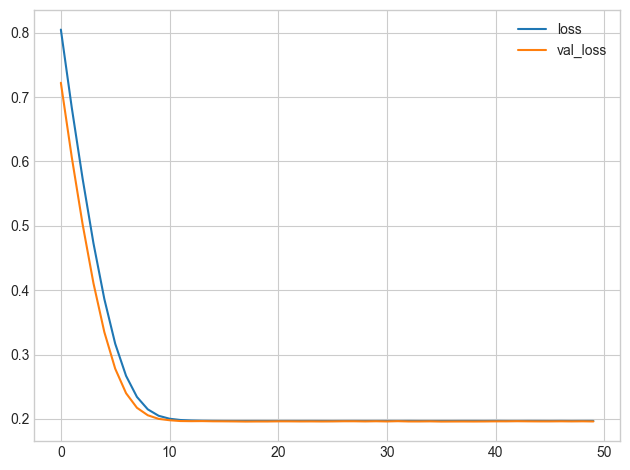

In [10]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

Minimum Validation Loss: 0.1959


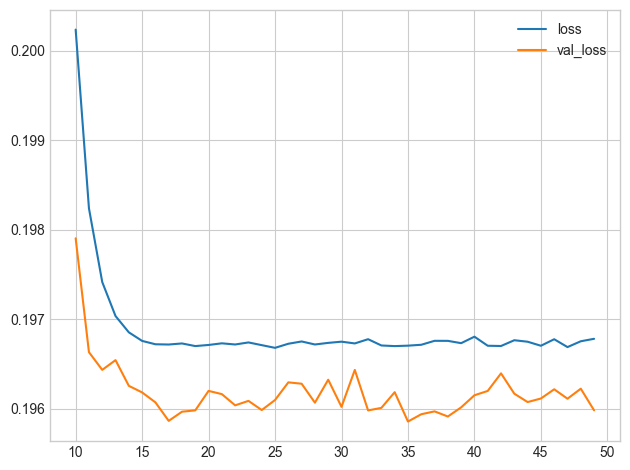

In [12]:
# Start the plot at epoch 10
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Epoch 1/50
49/49 [==============================] - 1s 9ms/step - loss: 0.2166 - val_loss: 0.2026
Epoch 2/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1991 - val_loss: 0.2013
Epoch 3/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1946 - val_loss: 0.1995
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1912 - val_loss: 0.1998
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1903 - val_loss: 0.1992
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1887 - val_loss: 0.1971
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1870 - val_loss: 0.1984
Epoch 8/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1866 - val_loss: 0.1973
Epoch 9/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1857 - val_loss: 0.1974
Epoch 10/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1845 - val_loss: 0.1970
Epoch 11/50
49/49 [

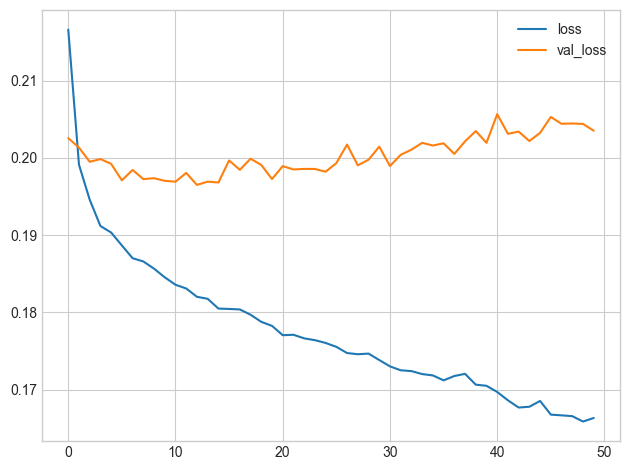

In [14]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [15]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Epoch 1/50
49/49 [==============================] - 1s 7ms/step - loss: 0.3114 - val_loss: 0.2120
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.2051 - val_loss: 0.2039
Epoch 3/50
49/49 [==============================] - 0s 9ms/step - loss: 0.1990 - val_loss: 0.2015
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1961 - val_loss: 0.1994
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1935 - val_loss: 0.1987
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1919 - val_loss: 0.1989
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1906 - val_loss: 0.1990
Epoch 8/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1893 - val_loss: 0.1974
Epoch 9/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1883 - val_loss: 0.1972
Epoch 10/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1876 - val_loss: 0.1977
Epoch 11/50
49/49 [

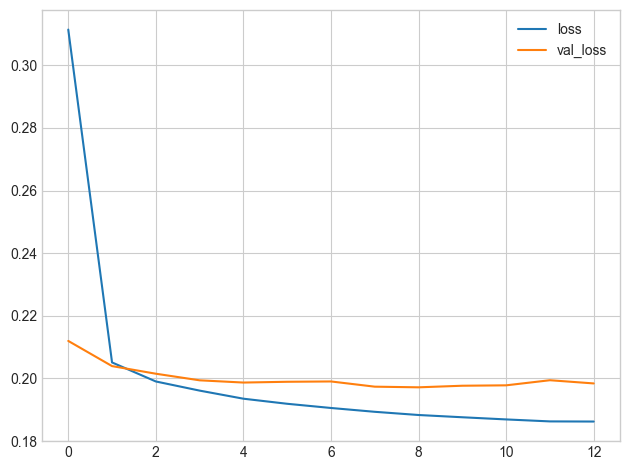

In [16]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))